In [ ]:
#importamos libreria imageio para manipular imagenes
import imageio
#importamos para manipular las imagenes
import numpy as np
#importamos para mostrar las imagenes
import matplotlib.pyplot as plt

def rgb2yiq(imagen):
    imagen = np.clip(imagen/255.,0.,1.) # imagen = imagen/255.

    #print("rgb2yiq: ",imagen.shape,imagen.dtype, "tamaño: ", imagen.min(),imagen.max())
    yiq= np.zeros(imagen.shape)
    yiq[:,:,0] = np.clip(0.299 * imagen[:,:,0] + 0.587 * imagen[:,:,1] + 0.114 * imagen[:,:,2], 0., 1.)
    yiq[:,:,1] = np.clip(0.595716 * imagen[:,:,0] - 0.274453 * imagen[:,:,1] - 0.321263 * imagen[:,:,2], -0.5957, 0.5957)
    yiq[:,:,2] = np.clip(0.211456 * imagen[:,:,0] - 0.522591 * imagen[:,:,1] + 0.311135 * imagen[:,:,2], -0.5226, 0.5226)
    return yiq

def yiq2rgb(imagen):

    #imagen = np.clip(imagen/255.,0.,1.)
    rgb = np.zeros(imagen.shape)
    rgb[:,:,0] = np.clip(imagen[:,:,0] + 0.9663 * imagen[:,:,1] + 0.6210 * imagen[:,:,2], 0., 1.)
    rgb[:,:,1] = np.clip(imagen[:,:,0] - 0.2721 * imagen[:,:,1] - 0.6474 * imagen[:,:,2], 0., 1.)
    rgb[:,:,2] = np.clip(imagen[:,:,0] - 1.1070 * imagen[:,:,1] + 1.7046 * imagen[:,:,2], 0., 1.)
    return rgb

def umbralGlobal(img, umbral):
  img_fila, img_columna = img.shape
  for i in range(img_fila):
        for j in range(img_columna):
            if img[i, j] > umbral:
              img[i, j] = 0
            else:
              img[i, j] = 1
  return img

<ipython-input-6-5668abf7bbf8>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen = imageio.imread('/content/image.jpg')


Media de la imagen:  0.06413297574718954


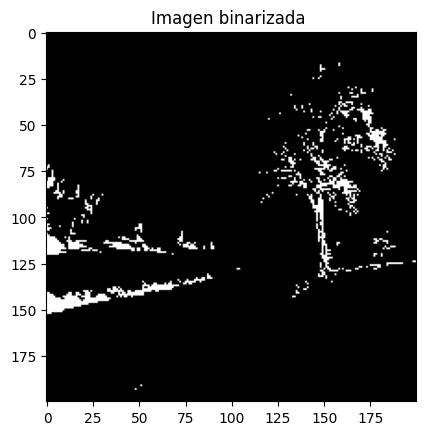

Porcentaje de píxeles negros: 95.91%


In [ ]:
#adfa
#1.Dadas imágenes a niveles de gris, binarizarlas y comparar los resultados:
#•El resultado final tiene 50% de pixels negros y blancos.
#•Encontrar dos modas “clara” y “oscura” y binarizar por distancia mínima.
#•Binarización de Otsu.
#2.En imágenes como la (a) encontrar los bordes aplicando Laplaciano, borde#morfológico, marching squares.

imagen = imageio.imread('/content/image.jpg')
imagen_yiq= rgb2yiq(imagen)

#Calculamos la media
media_imagen = np.mean(imagen_yiq)
print("Media de la imagen: ",media_imagen)
imagen_bin_Global = umbralGlobal(imagen_yiq[:,:,0],media_imagen)
plt.imshow(imagen_bin_Global, 'gray')
plt.title('Imagen binarizada ')
plt.show()
porcentaje = np.sum(imagen_bin_Global == 0) / (imagen_bin_Global.shape[0] * imagen_bin_Global.shape[1]) * 100
print(f"Porcentaje de píxeles negros: {porcentaje:.2f}%")












In [ ]:
def umbralLocal(img, tamano_ventana=15): # 3er parametro constante_c=15
# tamano_ventana = Define el tamaño de la vecindad alrededor de cada píxel para calcular su umbral
# constante_c = Ajusta el umbral hacia valores más oscuros
# Crear una matriz para almacenar el resultado
  img_thresh = np.zeros_like(img)

# Iterar sobre cada píxel de la imagen
  for i in range(tamano_ventana//2, img.shape[0]-tamano_ventana//2):
    for j in range(tamano_ventana//2, img.shape[1]-tamano_ventana//2):
      # Extraer la vecindad del píxel
      ventana = img[i-tamano_ventana//2:i+tamano_ventana//2+1,
                    j-tamano_ventana//2:j+tamano_ventana//2+1]
      # Calcular el umbral local
      umbral = np.mean(ventana) #- constante_c
      # Binarizar el píxel
      img_thresh[i, j] = 1 if img[i, j] > umbral else 0

  return img_thresh #.astype(np.uint8)

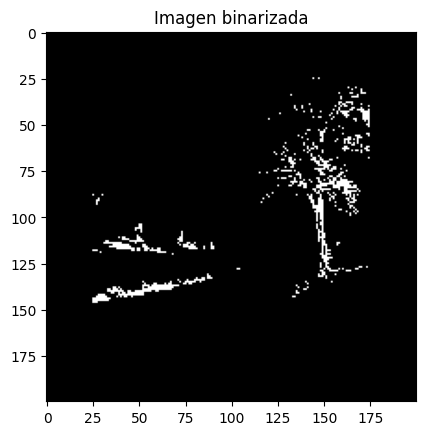

Porcentaje de píxeles negros: 97.44%


In [ ]:
#Calculando el tamano de ventana por fuerza bruta
imagen_bin_Local = umbralLocal(imagen_yiq[:,:,0],50)
plt.imshow(imagen_bin_Local, 'gray')
plt.title('Imagen binarizada')
plt.show()


porcentajeL = np.sum(imagen_bin_Local == 0) / (imagen_bin_Local.shape[0] * imagen_bin_Local.shape[1]) * 100
print(f"Porcentaje de píxeles negros: {porcentajeL:.2f}%")

In [ ]:
def binarizacionDistanciaMinima(canal, modo_oscura=50, modo_clara=200):
    """
    Realiza binarización por distancia mínima en un canal de imagen.

    Parámetros:
    - canal: array 2D correspondiente a un canal de una imagen (escala de grises).
    - modo_oscura: valor de referencia para la intensidad oscura.
    - modo_clara: valor de referencia para la intensidad clara.

    Retorna:
    - Imagen binarizada como array 2D.
    """
    # Calcular la distancia de cada píxel a las intensidades de modo oscuro y claro
    distancia_a_oscura = np.abs(canal - modo_oscura)
    distancia_a_clara = np.abs(canal - modo_clara)

    # Asignar cada píxel al grupo más cercano
    img_binarizada = np.where(distancia_a_clara < distancia_a_oscura, 1, 0)
    return img_binarizada

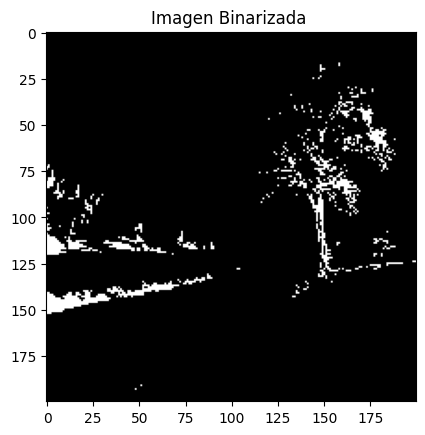

Porcentaje de píxeles negros: 95.91%


In [ ]:
#Calculando el tamano de ventana por fuerza bruta
imagen_bin_Dist_min = binarizacionDistanciaMinima(imagen_yiq[:,:,0],0.5,0.9)
#Mostrar resultado
plt.imshow(imagen_bin_Dist_min, 'gray')
plt.title('Imagen binarizada')
plt.show()
#Calculando el porcentaje
porcentajeDm = np.sum(imagen_bin_Dist_min == 0) / (imagen_bin_Dist_min.shape[0] * imagen_bin_Dist_min.shape[1]) * 100
print(f"Porcentaje de píxeles negros: {porcentajeDm:.2f}%")

In [ ]:
def umbralOtsu(img, bins=256):
    """
    Realiza la umbralización de Otsu en un canal de imagen en escala de grises.

    Parámetros:
    - img: array 2D correspondiente a un canal de una imagen (escala de grises).
    - bins: número de bins en el histograma (por defecto 256).

    Retorna:
    - final_thresh: el umbral óptimo calculado con el método de Otsu.
    - img_binarizada: imagen binarizada usando el umbral de Otsu.
    """
    # Calcular el histograma de la imagen
    hist, bin_edges = np.histogram(img, bins=bins, range=(0, 1))
    pixel_numb = img.shape[0] * img.shape[1]
    prom_pond = 1 / pixel_numb
    intensity = np.arange(bins)

    final_thresh = -1
    final_value = -1

    # Aplicar el método de Otsu para encontrar el mejor umbral
    for x in range(1, bins):
        pcb = np.sum(hist[:x])  # Probabilidad acumulada del fondo
        pcf = np.sum(hist[x:])  # Probabilidad acumulada del primer plano
        wb = pcb * prom_pond
        wf = pcf * prom_pond

        if pcb == 0 or pcf == 0:  # Evitar divisiones por cero
           continue

        mub = np.sum(intensity[:x] * hist[:x]) / pcb  # Media del fondo
        muf = np.sum(intensity[x:] * hist[x:]) / pcf  # Media del primer plano

        # Calcular la varianza entre clases
        value = wb * wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = bin_edges[x]
            final_value = value

    # Binarizar la imagen con el umbral óptimo
    img_binarizada = np.where(img > final_thresh, 1, 0)
    return final_thresh, img_binarizada.astype(np.uint8)

<ipython-input-14-127e058edf36>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen = imageio.imread('/content/image1.jpg')


Umbral óptimo (Otsu): 0.68359375
Porcentaje de píxeles negros: 54.16%


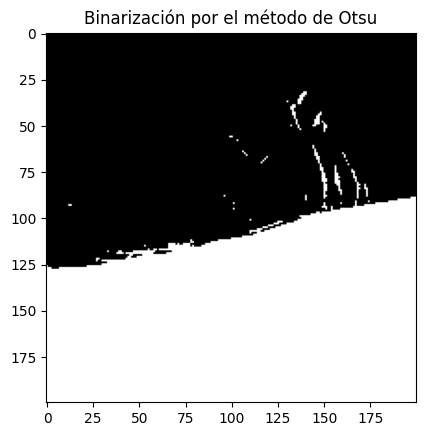

In [ ]:
# Cargar uuna imagen y convertir a YIQ
imagen = imageio.imread('/content/image1.jpg')
imagen_en_yiq = rgb2yiq(imagen)

# Aplicar umbralización de Otsu en el canal Y (luminancia)
canal_y = imagen_en_yiq[:, :, 0]
umbral, imagen_bin_Otsu = umbralOtsu(canal_y)
# Mostrar el resultado
print("Umbral óptimo (Otsu):", umbral)
porcentajeO = np.sum(imagen_bin_Otsu == 0) / (imagen_bin_Otsu.shape[0] * imagen_bin_Otsu.shape[1]) * 100
print(f"Porcentaje de píxeles negros: {porcentajeO:.2f}%")
plt.figure()
plt.title('Binarización por el método de Otsu')
plt.imshow(imagen_bin_Otsu, cmap='gray')
plt.show()


In [ ]:
#2.En imágenes como la (a) encontrar los bordes aplicando Laplaciano, borde#morfológico, marching squares.

#Aplicando filtro Laplaciano
imagen = imageio.imread('/content/image1.jpg')
imagen_en_yiq= rgb2yiq(imagen)


<ipython-input-15-e1e7682b3658>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen = imageio.imread('/content/image1.jpg')


In [ ]:
def laplace(_type=4,normalize=False):
    if _type==4:
        kernel =  np.array([[0.,-1.,0.],[-1.,4.,-1.],[0.,-1.,0.]])
    if _type==8:
        kernel =  np.array([[-1.,-1.,-1.],[-1.,8.,-1.],[-1.,-1.,-1.]])
    if normalize:
        kernel /= np.sum(np.abs(kernel))
    return kernel

def convolucionar(img, kernel):
    imgConvolucionada = np.zeros((np.array(img.shape) - np.array(kernel.shape)+1))
    for x in range(imgConvolucionada.shape[0]):
        for y in range(imgConvolucionada.shape[1]):
            imgConvolucionada[x,y] = (img[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).sum()
    return imgConvolucionada
import numpy as np

def colocarCanalaImg(imagen, canalY):
    # Dimensiones de la imagen original y del canal Y convolucionado
    filas_im, columnas_im, canales_im = imagen.shape
    filas_y, columnas_y = canalY.shape
    # Crear una copia de la imagen original para modificar solo el canal Y
    nueva_im = imagen.copy()
    # Calcular el inicio de inserción del canal Y para centrarlo en la imagen
    inicio_filas = (filas_im - filas_y) // 2
    inicio_columnas = (columnas_im - columnas_y) // 2
    # Colocar canalY en el centro de la nueva imagen y mantener los bordes
    nueva_im[inicio_filas:inicio_filas + filas_y, inicio_columnas:inicio_columnas + columnas_y, 0] = canalY
    # Devolver la nueva imagen con el canal Y colocado en el centro
    return nueva_im




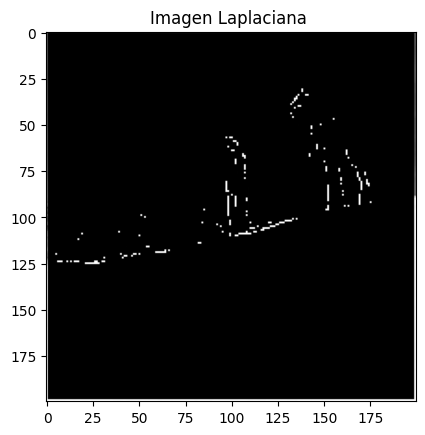

In [ ]:
kernelLaplace = laplace(8)
imagen_laplaciana = convolucionar(imagen_en_yiq[:,:,0],kernelLaplace)
im = colocarCanalaImg(imagen,imagen_laplaciana)
plt.imshow(im[:,:,0],"gray")
plt.title('Imagen Laplaciana ')
plt.show()

In [ ]:
def _convolution(image, kernel = np.ones((1,1)), option = 'sum'):
    convolved = np.zeros((np.array(image.shape)-np.array(kernel.shape)+1))
    if option == 'sum':
            for x in range(convolved.shape[0]):
                for y in range(convolved.shape[1]):
                    convolved[x,y] = (image[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).sum()
    if option == 'max':
            for x in range(convolved.shape[0]):
                for y in range(convolved.shape[1]):
                  convolved[x,y] = (image[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).max()
    if option == 'min':
            for x in range(convolved.shape[0]):
                for y in range(convolved.shape[1]):
                    convolved[x,y] = (image[x:x+kernel.shape[0],y:y+kernel.shape[1]]*kernel).min()
    return convolved

def ajustar_dimensiones(im1, im2):
    # Obtener las dimensiones de las dos imágenes
    filas_im1, columnas_im1 = im1.shape
    filas_im2, columnas_im2 = im2.shape
    # Determinar cuál imagen es más grande
    filas_max = max(filas_im1, filas_im2)
    columnas_max = max(columnas_im1, columnas_im2)
    # Crear nuevas imágenes rellenas de ceros del tamaño de la imagen mayor
    #Influye que el fondo sea negro o blanco
    nueva_im1 = np.zeros((filas_max, columnas_max), dtype=im1.dtype)
    nueva_im2 = np.zeros((filas_max, columnas_max), dtype=im2.dtype)
    # Calcular el centro para insertar la imagen pequeña en la grande
    inicio_filas_im1 = (filas_max - filas_im1) // 2
    inicio_columnas_im1 = (columnas_max - columnas_im1) // 2
    inicio_filas_im2 = (filas_max - filas_im2) // 2
    inicio_columnas_im2 = (columnas_max - columnas_im2) // 2
    # Colocar im1 en el centro de nueva_im1
    nueva_im1[inicio_filas_im1:inicio_filas_im1 + filas_im1, inicio_columnas_im1:inicio_columnas_im1 + columnas_im1] = im1
    # Colocar im2 en el centro de nueva_im2
    nueva_im2[inicio_filas_im2:inicio_filas_im2 + filas_im2, inicio_columnas_im2:inicio_columnas_im2 + columnas_im2] = im2
    return nueva_im1, nueva_im2
# funciones de operaciones de morfologia
def im_erode(image,se):
    eroded = _convolution(image,se,'min')
    return eroded

def im_dilate(image,se):
    dilated = _convolution(image,se,'max')
    return dilated

def im_border_ext(im, se):
    # Ajustar las dimensiones de la imagen dilatada y la original
    im_ajustada, dilatada_ajustada = ajustar_dimensiones(im, im_dilate(im, se))
    #Esto es importante, la resta se sale del rango lo que origina gris por lo que
    #se uso clip para limitarlo
    return np.clip(dilatada_ajustada - im_ajustada,0,1)

def im_border_int(im, se):
    # Ajustar las dimensiones de la imagen erosionada y la original
    im_ajustada, erosionada_ajustada = ajustar_dimensiones(im, im_erode(im, se))
    return im_ajustada - erosionada_ajustada

<ipython-input-21-ea9d5d51428c>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagenMorfologica = imageio.imread('/content/image1.jpg')


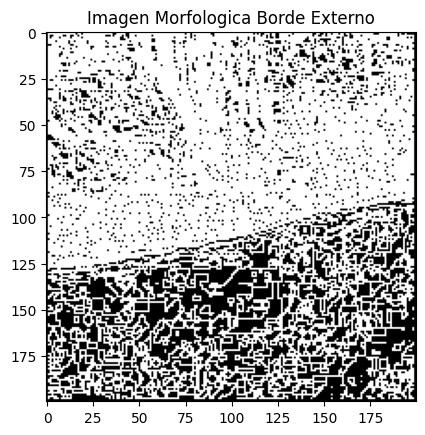

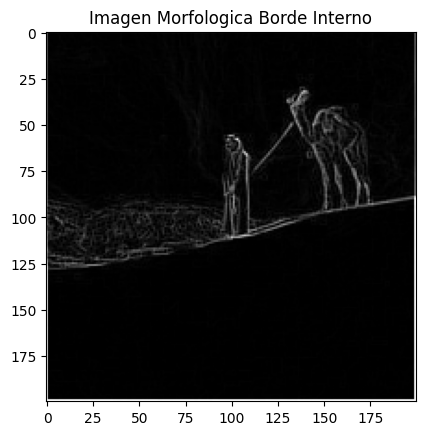

In [ ]:
#Aplicando filtro Morfologico
imagenMorfologica = imageio.imread('/content/image1.jpg')
im_M1 = im_border_ext(imagenMorfologica[:,:,0], np.ones((3,3)))
plt.imshow(im_M1,"gray")
plt.title('Imagen Morfologica Borde Externo')
plt.show()
im_M2 =im_border_int(imagenMorfologica[:,:,0], np.ones((3,3)))
plt.imshow(im_M2,"gray")
plt.title('Imagen Morfologica Borde Interno')
plt.show()

In [ ]:
#Aplicando marching squares
def segmentar_marching_squares(canal, umbral):
    """
    Segmenta un canal de imagen usando el método de Marching Squares basado en un umbral.

    Args:
    - canal (2D np.array): Canal de la imagen a segmentar.
    - umbral (float): Valor umbral para definir contornos.

    Returns:
    - contorno (2D np.array): Matriz binaria con la segmentación (1 en contorno, 0 en fondo).
    """
    # Tamaño del canal
    filas, columnas = canal.shape

    # Crear una matriz para almacenar el contorno
    contorno = np.zeros((filas - 1, columnas - 1), dtype=np.uint8)

    # Recorrer cada celda de 2x2 (excepto los bordes)
    for i in range(filas - 1):
        for j in range(columnas - 1):
            # Obtener los valores de la celda de 2x2
            a = canal[i, j] >= umbral       # Esquina superior izquierda
            b = canal[i, j + 1] >= umbral   # Esquina superior derecha
            c = canal[i + 1, j + 1] >= umbral # Esquina inferior derecha
            d = canal[i + 1, j] >= umbral   # Esquina inferior izquierda

            # Calcular el índice de la celda en base a los valores de los píxeles (0 a 15)
            index = (a << 3) | (b << 2) | (c << 1) | d

            # Determinar si el contorno debe ser marcado para esta celda
            if index in {1, 2, 4, 7, 8, 11, 13, 14}:
                contorno[i, j] = 1  # Se marca como contorno

            # Aquí puedes agregar una lógica de primer o segundo orden si se requiere un mayor detalle en el contorno

    return contorno

<ipython-input-24-c1679e171780>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen = imageio.imread('/content/image1.jpg')


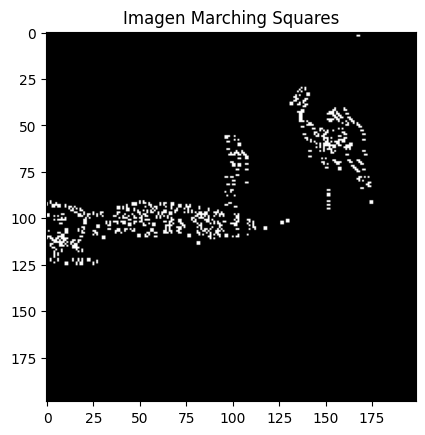

In [ ]:
imagen = imageio.imread('/content/image1.jpg')
imagen_en_yiq= rgb2yiq(imagen)

imMachin = segmentar_marching_squares(imagen_en_yiq[:,:,0],0.4)
plt.imshow(imMachin,"gray")
plt.title('Imagen Marching Squares')
plt.show()